In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
pio.templates.default="plotly_dark"
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
#EDA
from collections import Counter
#Data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeLinq
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#conbine al model aka ensembling
from mlxtend.classifier import StackingCVClassifier
# import pandas_profiling as pp
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataFrame=pd.read_csv("/content/drive/MyDrive/LoanData.csv")

dataFrame.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,PartyId,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,5/15/2023,D8EBF360-104C-420F-BEC9-000924E6EFC7,3015853,9/9/2022 12:27,9/9/2022 15:27,11,0.0,88.0,{1AD71AF0-8240-4700-B602-ADA90177DD8C},False,...,0.0,NaN,NaN,6/7/2023,2.0,53.0,4/10/2023,NaN,NaN,NaN
1,5/15/2023,66AE108B-532B-4BB3-BAB7-0019A46412C1,483449,3/23/2016 16:07,3/23/2016 16:07,970,1150.0,5.0,{EBF05573-554D-4A3B-BC77-A2CF00B7D110},False,...,0.0,10/28/2019,1/27/2020,NaN,NaN,NaN,NaN,0.0,79.93,15-Aug
2,5/15/2023,A6635EA6-2F39-4DEA-AA3B-001C9521BE7C,2819530,5/31/2022 15:11,5/31/2022 18:11,16,0.0,0.0,{F6507F91-F992-41FA-BB4C-AC37009B3E58},False,...,0.0,NaN,NaN,6/9/2023,13.0,60.0,NaN,NaN,NaN,NaN
3,5/15/2023,636993AA-338B-45FD-A60C-001E6282489C,3398045,1/17/2023 14:46,1/17/2023 16:46,12,0.0,3.0,{04336B48-A730-4201-9924-AE6F0137CD71},False,...,0.0,4/4/2023,4/4/2028,6/5/2023,3.0,120.0,3/7/2023,NaN,NaN,NaN
4,5/15/2023,B17292D8-7999-4372-86EB-0038041ABDB6,3618149,3/27/2023 21:08,3/28/2023 0:08,0,0.0,0.0,{42A0E513-A2AF-48D8-BA6D-AE2C00FB1B4C},False,...,0.0,NaN,NaN,6/2/2023,2.0,60.0,NaN,NaN,NaN,NaN


In [3]:
dataFrame.tail()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,PartyId,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
303338,5/15/2023,4F8E6CFA-211C-4BEA-B486-FFB75E6661E4,3692319,4/27/2023 13:01,4/27/2023 16:01,0,0.0,0.0,{2A623380-97B2-4675-9300-ADAC00C431A9},True,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303339,5/15/2023,A77DBDE2-EEA1-4E64-85D0-FFBA0A565AD0,2842127,6/10/2022 10:03,6/10/2022 13:03,14,0.0,2.0,{13148889-E29D-4661-8AEC-A43600BC8177},False,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303340,5/15/2023,26FF66C8-4E3A-4EE2-9412-FFBA6D67E454,2980894,8/20/2022 11:36,8/20/2022 14:36,10,0.0,3.0,{AB2D974C-E661-4D9A-8D09-ACBC017DD033},False,...,0.0,5/22/2023,5/20/2024,5/22/2023,1.0,132.0,4/24/2023,NaN,NaN,NaN
303341,5/15/2023,2F23745F-D1F7-4064-A416-FFD0DCDFD9D8,3463743,2/9/2023 6:37,2/9/2023 8:37,78,0.0,50.0,{A08F05FC-3906-4A5F-87BC-ACB40026235B},False,...,0.0,NaN,NaN,6/15/2023,5.0,60.0,NaN,NaN,NaN,NaN
303342,5/15/2023,430840D3-58C4-4651-88DE-FFF979D8D853,3631332,3/31/2023 8:44,3/31/2023 11:44,0,1.0,0.0,{50730618-86D6-4DAE-80CF-A23E0129DE74},False,...,0.0,NaN,NaN,6/8/2023,3.0,60.0,NaN,NaN,NaN,NaN


In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303343 entries, 0 to 303342
Columns: 112 entries, ReportAsOfEOD to ActiveLateLastPaymentCategory
dtypes: bool(3), float64(60), int64(14), object(35)
memory usage: 253.1+ MB


In [5]:
print(dataFrame.shape)

(303343, 112)


In [6]:
remove_columns=['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'BiddingStartedOn', 'PartyId', 'LoanApplicationStartedDate', 'LoanDate', 'ContractEndDate', 'FirstPaymentDate',
              'MaturityDate_Original', 'MaturityDate_Last', 'DateOfBirth', 'County', 'City', 'LastPaymentOn', 'DebtOccuredOn', 'DebtOccuredOnForSecondary', 'DefaultDate', 'GracePeriodStart', 'IncomeFromFamilyAllowance',
              'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn', 'ActiveLateLastPaymentCategory', 'EL_V0', 'Rating_V0', 'StageActiveSince', 'IncomeFromPrincipalEmployer', 'IncomeFromPension', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther', 'LanguageCode' , 'Country', 'ApplicationSignedHour', 'ApplicationSignedWeekday', 'Country', 'OccupationArea', 'ModelVersion', 'NrOfScheduledPayments']
print(len(remove_columns))


42


In [7]:
dataFrame.drop(remove_columns,axis=1,inplace=True)

In [8]:
dataFrame.isnull().sum()

BidsPortfolioManager                           0
BidsApi                                        0
BidsManual                                     0
NewCreditCustomer                              0
VerificationType                              50
                                           ...  
PreviousEarlyRepaymentsBefoleLoan         242742
PreviousEarlyRepaymentsCountBeforeLoan        12
NextPaymentNr                             134560
PrincipalDebtServicingCost                203542
InterestAndPenaltyDebtServicingCost       203542
Length: 71, dtype: int64

In [9]:
nan=dataFrame.isnull().sum()[dataFrame.isnull().sum()>0]
print(nan/len(dataFrame))
nan=nan/len(dataFrame)
remove_columns=list(nan[nan>0.5].index)
print(len(remove_columns))

VerificationType                          0.000165
Gender                                    0.000148
MonthlyPayment                            0.022054
Education                                 0.000165
MaritalStatus                             0.000165
NrOfDependants                            0.882641
EmploymentStatus                          0.000666
EmploymentDurationCurrentEmployer         0.014578
EmploymentPosition                        1.000000
WorkExperience                            0.879602
HomeOwnershipType                         0.005462
DebtToIncome                              0.000165
FreeCash                                  0.000165
PlannedPrincipalTillDate                  0.820454
PlannedInterestTillDate                   0.016964
CurrentDebtDaysPrimary                    0.641165
CurrentDebtDaysSecondary                  0.608232
ExpectedLoss                              0.008700
LossGivenDefault                          0.008700
ExpectedReturn                 

In [10]:
dataFrame.drop(remove_columns,axis=1,inplace=True)
print(dataFrame.shape)

(303343, 47)


<h1> Exploratory data analysis (EDA)

In [11]:
numerical_colums=[col for col in dataFrame.columns if dataFrame[col].dtype!=object]
categorical_colums=[col for col in dataFrame.columns if dataFrame[col].dtype==object]
print("The Numerical features  =",len(numerical_colums))
print("The Categorical features =",len(categorical_colums))

The Numerical features  = 42
The Categorical features = 5


In [12]:
def Numerical_Summary():
    for col in numerical_colums:
        print(col)
        print("No of Missing Values =", dataFrame[col].isnull().sum())
        print("Skew =",dataFrame[col].skew())
        print("Histogram")
        fig=px.histogram(data_frame=dataFrame,x=col)
        fig.show()
        print("="*50)

def Categorical_Summary():
    for col in categorical_colums:
        print(col)
        print("No of Missin Values =",dataFrame[col].isnull().sum())
        print(dataFrame[col].value_counts())
        print("="*50)

In [13]:
print(dataFrame.columns)

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'VerificationType', 'Age', 'Gender', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'UseOfLoan', 'Education',
       'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'HomeOwnershipType', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule', 'RecoveryStage',
       'Rating', 'Status', 'Restructured', 'WorseLateCategory',
       'CreditScoreEsMicroL', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsB

In [14]:
# List of categorical columns
categorical_columns = ['NewCreditCustomer', 'VerificationType', 'Gender',
                      'UseOfLoan', 'Education', 'MaritalStatus',
                       'EmploymentStatus', 'EmploymentDurationCurrentEmployer',
                       'HomeOwnershipType',
                        'ActiveScheduleFirstPaymentReached',
                       'RecoveryStage', 'Rating', 'Status', 'Restructured',
                       'WorseLateCategory', 'CreditScoreEsMicroL',
                       ]

# Output unique labels for categorical columns
for column in categorical_columns:
    unique_labels = dataFrame[column].unique()
    print(f"Unique labels in {column}:")
    for label in unique_labels:
        print(label)
    print()  # Print an empty line between columns


Unique labels in NewCreditCustomer:
False
True

Unique labels in VerificationType:
4.0
1.0
3.0
2.0
nan
0.0

Unique labels in Gender:
1.0
0.0
2.0
nan

Unique labels in UseOfLoan:
-1
2
3
7
8
6
0
5
4
1
101
104
102
110
108
106
107

Unique labels in Education:
3.0
4.0
1.0
5.0
2.0
-1.0
nan
0.0

Unique labels in MaritalStatus:
-1.0
2.0
4.0
1.0
3.0
5.0
nan
0.0

Unique labels in EmploymentStatus:
-1.0
6.0
5.0
3.0
2.0
4.0
nan
0.0

Unique labels in EmploymentDurationCurrentEmployer:
UpTo5Years
MoreThan5Years
UpTo3Years
Retiree
UpTo1Year
nan
Other
UpTo2Years
UpTo4Years
TrialPeriod

Unique labels in HomeOwnershipType:
10.0
1.0
8.0
3.0
2.0
4.0
6.0
9.0
7.0
5.0
nan
0.0
-1.0

Unique labels in ActiveScheduleFirstPaymentReached:
True
False

Unique labels in RecoveryStage:
1.0
2.0
nan
3.0

Unique labels in Rating:
D
C
B
A
F
HR
E
AA
nan

Unique labels in Status:
Current
Late
Repaid

Unique labels in Restructured:
False
True

Unique labels in WorseLateCategory:
7-Jan
180+
nan
16-30
61-90
121-150
31-60
15-Au

In [15]:
# List of categorical columns
categorical_columns = ['NewCreditCustomer', 'VerificationType', 'Gender', 'LoanDuration', 'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus', 'EmploymentDurationCurrentEmployer', 'HomeOwnershipType', 'ExistingLiabilities', 'RefinanceLiabilities', 'MonthlyPaymentDay', 'ActiveScheduleFirstPaymentReached', 'RecoveryStage', 'Rating', 'Status', 'Restructured', 'WorseLateCategory', 'CreditScoreEsMicroL', 'NoOfPreviousLoansBeforeLoan', 'PreviousEarlyRepaymentsCountBeforeLoan', 'NextPaymentNr', 'LoanDuration', 'ExistingLiabilities', 'RefinanceLiabilities', 'MonthlyPaymentDay', 'NoOfPreviousLoansBeforeLoan', 'PreviousEarlyRepaymentsCountBeforeLoan', 'NextPaymentNr']

# Replace NaN with mode in categorical columns
for column in categorical_columns:
    mode_value = dataFrame[column].mode()[0]
    dataFrame[column].fillna(mode_value, inplace=True)

# Print the updated dataFrameFrame
print(dataFrame)


        BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                         11      0.0        88.0              False   
1                        970   1150.0         5.0              False   
2                         16      0.0         0.0              False   
3                         12      0.0         3.0              False   
4                          0      0.0         0.0              False   
...                      ...      ...         ...                ...   
303338                     0      0.0         0.0               True   
303339                    14      0.0         2.0              False   
303340                    10      0.0         3.0              False   
303341                    78      0.0        50.0              False   
303342                     0      1.0         0.0              False   

        VerificationType  Age  Gender  AppliedAmount  Amount  Interest  ...  \
0                    4.0   27     1.0         3189.0  31

In [16]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Label encode the "NewCreditCustomer" variable
dataFrame['NewCreditCustomer'] = label_encoder.fit_transform(dataFrame['NewCreditCustomer'])

In [17]:
dataFrame['VerificationType'] = label_encoder.fit_transform(dataFrame['VerificationType'])

In [18]:
dataFrame['CreditScoreEsMicroL'] = label_encoder.fit_transform(dataFrame['CreditScoreEsMicroL'])

In [19]:
dataFrame['Gender'] = label_encoder.fit_transform(dataFrame['Gender'])
dataFrame['LoanDuration'] = label_encoder.fit_transform(dataFrame['LoanDuration'])
dataFrame['UseOfLoan'] = label_encoder.fit_transform(dataFrame['UseOfLoan'])
dataFrame['Education'] = label_encoder.fit_transform(dataFrame['Education'])
dataFrame['MaritalStatus'] = label_encoder.fit_transform(dataFrame['MaritalStatus'])
dataFrame['EmploymentStatus'] = label_encoder.fit_transform(dataFrame['EmploymentStatus'])
dataFrame['EmploymentDurationCurrentEmployer'] = label_encoder.fit_transform(dataFrame['EmploymentDurationCurrentEmployer'])
dataFrame['HomeOwnershipType'] = label_encoder.fit_transform(dataFrame['HomeOwnershipType'])
dataFrame['ExistingLiabilities'] = label_encoder.fit_transform(dataFrame['ExistingLiabilities'])
dataFrame['RefinanceLiabilities'] = label_encoder.fit_transform(dataFrame['RefinanceLiabilities'])
dataFrame['MonthlyPaymentDay'] = label_encoder.fit_transform(dataFrame['MonthlyPaymentDay'])
dataFrame['ActiveScheduleFirstPaymentReached'] = label_encoder.fit_transform(dataFrame['ActiveScheduleFirstPaymentReached'])
dataFrame['Rating'] = label_encoder.fit_transform(dataFrame['Rating'])
dataFrame['Status'] = label_encoder.fit_transform(dataFrame['Status'])
dataFrame['Restructured'] = label_encoder.fit_transform(dataFrame['Restructured'])
dataFrame['WorseLateCategory'] = label_encoder.fit_transform(dataFrame['WorseLateCategory'])
dataFrame['CreditScoreEsMicroL'] = label_encoder.fit_transform(dataFrame['CreditScoreEsMicroL'])
dataFrame['NoOfPreviousLoansBeforeLoan'] = label_encoder.fit_transform(dataFrame['NoOfPreviousLoansBeforeLoan'])
dataFrame['PreviousEarlyRepaymentsCountBeforeLoan'] = label_encoder.fit_transform(dataFrame['PreviousEarlyRepaymentsCountBeforeLoan'])
dataFrame['NextPaymentNr'] = label_encoder.fit_transform(dataFrame['NextPaymentNr'])


In [20]:
plt.figure(figsize=(25,25))
sns.heatmap(dataFrame[numerical_colums].corr(),annot=True,cmap='viridis')

Output hidden; open in https://colab.research.google.com to view.

In [21]:
px.scatter_3d(data_frame=dataFrame,x="AppliedAmount",y='Amount',z='IncomeTotal')

Output hidden; open in https://colab.research.google.com to view.

In [22]:
pd.crosstab(dataFrame['Status'], dataFrame['UseOfLoan'])

UseOfLoan,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Status,,,,,,,,,,,,,,,,,
0,103776,130,21,276,37,34,42,46,190,41,0,0,0,0,0,0,0
1,75854,1500,206,2356,474,390,511,646,2879,392,0,0,0,0,0,0,0
2,87125,5284,728,6559,1441,942,1234,2459,6631,1086,5,21,6,1,2,1,17


In [23]:
pd.crosstab(dataFrame['Status'],dataFrame['EmploymentStatus'])

EmploymentStatus,0,1,2,3,4,5,6
Status,,,,,,,
0,103776,0,14,689,30,62,22
1,75856,4,377,7298,532,317,824
2,87325,28,793,22073,741,1628,954


In [24]:
pd.crosstab(dataFrame['Status'],dataFrame['CreditScoreEsMicroL'])

CreditScoreEsMicroL,0,1,2,3,4,5,6,7,8,9,10
Status,,,,,,,,,,,
0,104539,33,1,2,4,4,8,2,0,0,0
1,77752,2606,38,947,924,983,1430,362,43,68,55
2,108536,1682,16,774,716,553,994,196,26,34,15


In [25]:
import plotly.express as px

# Map the numeric labels to their corresponding categories
status_mapping = {
    0: 'Current',
    1: 'Late',
    2: 'Repaid'
}
dataFrame['Status'] = dataFrame['Status'].map(status_mapping)

# Create a box plot using Plotly
fig = px.box(dataFrame, x='Status', y='ExistingLiabilities', points='all')
fig.update_layout(
    title="Box Plot of Existing Liabilities by Status",
    xaxis_title="Status",
    yaxis_title="Existing Liabilities"
)
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [26]:
dataFrame['NewCreditCustomer'].value_counts()

1    164966
0    138377
Name: NewCreditCustomer, dtype: int64

In [27]:
dataFrame['VerificationType'].value_counts()

4    236471
1     55608
3      9428
2      1828
0         8
Name: VerificationType, dtype: int64

In [28]:
dataFrame['MonthlyPayment'].value_counts()

108.27    12008
108.17     8164
103.75     6540
0.00       3627
13.51      3326
          ...  
381.42        1
467.64        1
378.69        1
582.92        1
206.63        1
Name: MonthlyPayment, Length: 30138, dtype: int64

In [29]:
dataFrame['EmploymentStatus'].value_counts()

0    266957
3     30060
5      2007
6      1800
4      1303
2      1184
1        32
Name: EmploymentStatus, dtype: int64

In [30]:
dataFrame['Gender'].value_counts()

0    173424
1    113441
2     16478
Name: Gender, dtype: int64

In [31]:
dataFrame['AppliedAmount'].value_counts()

4150.00     27738
530.00      20389
531.00      18335
2126.00     12511
518.00      11702
            ...  
874.75          1
977.98          1
1314.89         1
207.90          1
11478.00        1
Name: AppliedAmount, Length: 2319, dtype: int64

In [32]:
# Iterate through columns and print the number of unique categories
for column in dataFrame.columns:
    unique_categories = dataFrame[column].nunique()
    print(f"Number of unique categories in {column}: {unique_categories}")

Number of unique categories in BidsPortfolioManager: 5814
Number of unique categories in BidsApi: 1287
Number of unique categories in BidsManual: 4534
Number of unique categories in NewCreditCustomer: 2
Number of unique categories in VerificationType: 5
Number of unique categories in Age: 62
Number of unique categories in Gender: 3
Number of unique categories in AppliedAmount: 2319
Number of unique categories in Amount: 7278
Number of unique categories in Interest: 7109
Number of unique categories in LoanDuration: 59
Number of unique categories in MonthlyPayment: 30138
Number of unique categories in UseOfLoan: 17
Number of unique categories in Education: 7
Number of unique categories in MaritalStatus: 7
Number of unique categories in EmploymentStatus: 7
Number of unique categories in EmploymentDurationCurrentEmployer: 9
Number of unique categories in HomeOwnershipType: 12
Number of unique categories in IncomeTotal: 5945
Number of unique categories in ExistingLiabilities: 39
Number of u

<Axes: >

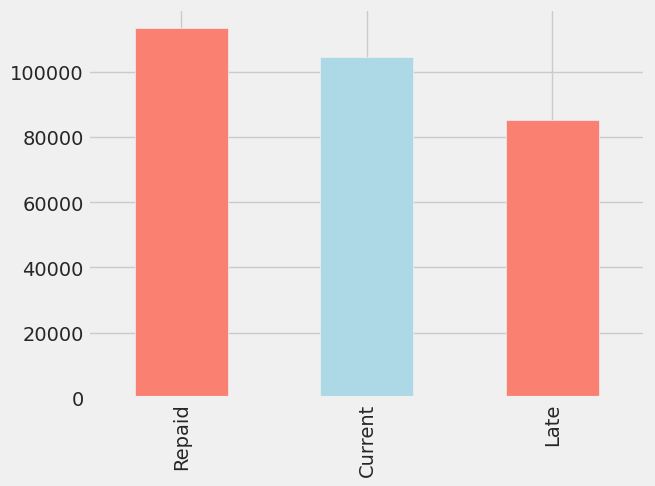

In [33]:
#exploratory data analysis
dataFrame.Status.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [34]:
dataFrame['Status'].value_counts()


Repaid     113542
Current    104593
Late        85208
Name: Status, dtype: int64

In [35]:
dataFrame['Status'] = label_encoder.fit_transform(dataFrame['Status'])

In [36]:
dataFrame.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,Age,Gender,AppliedAmount,Amount,Interest,...,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr
0,11,0.0,88.0,0,4,27,1,3189.0,3189.0,35.48,...,0,209.71,633.6800,2979.29,0.00,1,3402.0,1161.57,0,2
1,970,1150.0,5.0,0,4,53,1,2125.0,2125.0,20.97,...,0,1021.51,1187.9100,1103.49,507.21,1,500.0,590.95,0,0
2,16,0.0,0.0,0,4,25,0,531.0,531.0,25.27,...,0,64.30,107.1200,466.70,0.00,8,8609.0,931.98,0,13
3,12,0.0,3.0,0,4,39,1,425.0,425.0,16.55,...,0,9.54,18.9900,415.46,0.00,5,11268.0,1378.09,0,3
4,0,0.0,0.0,0,4,40,1,518.0,518.0,19.88,...,0,5.20,9.2245,512.80,0.00,10,19283.0,2141.75,0,2


In [37]:
dataFrame.tail()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,Age,Gender,AppliedAmount,Amount,Interest,...,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr
303338,0,0.0,0.0,1,4,37,0,4146.0,4146.0,19.86,...,0,4146.00,12.654,0.00,NaN,1,4146.0,NaN,0,0
303339,14,0.0,2.0,0,4,38,1,531.0,531.0,16.22,...,0,531.00,39.570,0.00,NaN,5,6373.0,592.95,0,0
303340,10,0.0,3.0,0,4,56,1,318.0,318.0,21.94,...,0,3.40,42.440,314.60,NaN,5,10630.0,190.65,0,1
303341,78,0.0,50.0,0,4,61,0,4253.0,4253.0,14.12,...,0,152.58,100.370,4100.42,NaN,9,11159.0,2436.35,0,5
303342,0,1.0,0.0,0,4,49,1,425.0,425.0,17.96,...,0,9.23,7.220,415.77,NaN,10,12009.0,1045.86,0,3


In [38]:
# List of variables with their counts of missing values
variables_with_missing = {
    "MonthlyPayment": 6690,
    "DebtToIncome": 50,
    "FreeCash": 50,
    "PlannedInterestTillDate": 5146,
    "ExpectedLoss": 2639,
    "LossGivenDefault": 2639,
    "ExpectedReturn": 2639,
    "ProbabilityOfDefault": 2639,
    "PrincipalOverdueBySchedule": 14852,
    "InterestAndPenaltyBalance": 129308,
    "AmountOfPreviousLoansBeforeLoan": 12,
    "PreviousRepaymentsBeforeLoan": 115976
}

# Replace missing values with mean for continuous variables and mode for categorical variables
for variable, count in variables_with_missing.items():
    if variable in dataFrame.columns:
        if dataFrame[variable].dtype == 'object':  # Categorical variables
            mode_value = dataFrame[variable].mode()[0]
            dataFrame[variable].fillna(mode_value, inplace=True)
        else:  # Continuous variables
            mean_value = dataFrame[variable].mean()
            dataFrame[variable].fillna(mean_value, inplace=True)

# Print the first few rows of the updated dataset
print(dataFrame.head())

   BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                    11      0.0        88.0                  0   
1                   970   1150.0         5.0                  0   
2                    16      0.0         0.0                  0   
3                    12      0.0         3.0                  0   
4                     0      0.0         0.0                  0   

   VerificationType  Age  Gender  AppliedAmount  Amount  Interest  ...  \
0                 4   27       1         3189.0  3189.0     35.48  ...   
1                 4   53       1         2125.0  2125.0     20.97  ...   
2                 4   25       0          531.0   531.0     25.27  ...   
3                 4   39       1          425.0   425.0     16.55  ...   
4                 4   40       1          518.0   518.0     19.88  ...   

   CreditScoreEsMicroL  PrincipalPaymentsMade  InterestAndPenaltyPaymentsMade  \
0                    0                 209.71                        63

In [39]:

dataFrame.to_csv('/content/cleaned_data.csv', index=False)


In [ ]:
# Calculate correlations of all variables against 'Status'
correlation_with_status = dataFrame.corr()['Status'].sort_values(ascending=False)

# Print correlation values
print("Correlation of variables with 'Status':")
print(correlation_with_status)


Correlation of variables with 'Status':
Status                                    1.000000
PrincipalPaymentsMade                     0.438717
ActiveScheduleFirstPaymentReached         0.432254
PlannedInterestTillDate                   0.411264
EmploymentStatus                          0.278485
MaritalStatus                             0.275620
UseOfLoan                                 0.245133
DebtToIncome                              0.223347
BidsPortfolioManager                      0.216789
RecoveryStage                             0.213836
ProbabilityOfDefault                      0.197706
BidsManual                                0.185241
ExpectedReturn                            0.174514
ExpectedLoss                              0.150402
Interest                                  0.142355
Rating                                    0.133125
RefinanceLiabilities                      0.113901
NewCreditCustomer                         0.090229
FreeCash                                  

Based on the correlation values with the 'Status' variable, here are the top 15 variables that I would recommend selecting for our algorithm, along with brief reasons for their selection:

PrincipalPaymentsMade: This variable has a relatively high positive correlation with 'Status' (0.438807), indicating a potential strong relationship with the target.

ActiveScheduleFirstPaymentReached: Another high positive correlation (0.432231), suggesting it might be an important predictor.

PlannedInterestTillDate: Strong positive correlation (0.411382), indicating potential significance.

DebtToIncome: Positive correlation (0.223419), suggests it might impact 'Status'.

VerificationType: Positive correlation (0.223320), indicating it might play a role in predicting 'Status'.

BidsPortfolioManager: Positive correlation (0.216937), potentially relevant.

ProbabilityOfDefault: Positive correlation (0.197780), suggests potential importance.

BidsManual: Positive correlation (0.185101), might be informative.

ExpectedReturn: Positive correlation (0.174655), may provide predictive power.

ExpectedLoss: Positive correlation (0.150457), could contribute to predicting 'Status'.

Interest: Positive correlation (0.142366), could be relevant.

Rating: Positive correlation (0.133234), might be a relevant factor.

RefinanceLiabilities: Positive correlation (0.113716), potentially informative.

NewCreditCustomer: Positive correlation (0.090130), indicating potential importance.

FreeCash: Positive correlation (0.084258), may have predictive value.

These variables were selected based on their positive correlation with the 'Status' variable, suggesting that they might have a meaningful impact on predicting loan status

In [ ]:

variables_for_heatmap = dataFrame

# Plot heatmap
plt.figure(figsize=(45, 45))
sns.heatmap(variables_for_heatmap.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of All Variables')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Check for missing values in the entire dataset
missing_values = dataFrame.isnull().sum()

# Filter variables with missing values
variables_with_nan = missing_values[missing_values > 0]

# Display variables with missing values
print(variables_with_nan)

Series([], dtype: int64)


In [ ]:
#Select the top 15 variables based on correlation with 'Status'
selected_variables = [
    'PrincipalPaymentsMade', 'ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
    'DebtToIncome', 'VerificationType', 'BidsPortfolioManager', 'ProbabilityOfDefault',
    'BidsManual', 'ExpectedReturn', 'ExpectedLoss', 'Interest', 'Rating', 'RefinanceLiabilities',
    'NewCreditCustomer', 'FreeCash'
]

# Split the data into features (X) and target variable (y)
X = dataFrame[selected_variables]
y = dataFrame['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#normalizing the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Print the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (242674, 15)
X_test shape: (60669, 15)
y_train shape: (242674,)
y_test shape: (60669,)


In [ ]:
print(y_test.unique())
Counter(y_train)

[1 2 0]


Counter({1: 68292, 2: 90759, 0: 83623})

Confusion matrix:
[[16577  4215   178]
 [ 4248 12271   397]
 [ 4189 14289  4305]]


Accuracy of Naive Bayes model: 54.64570044009296 %

              precision    recall  f1-score   support

           0       0.66      0.79      0.72     20970
           1       0.40      0.73      0.51     16916
           2       0.88      0.19      0.31     22783

    accuracy                           0.55     60669
   macro avg       0.65      0.57      0.52     60669
weighted avg       0.67      0.55      0.51     60669



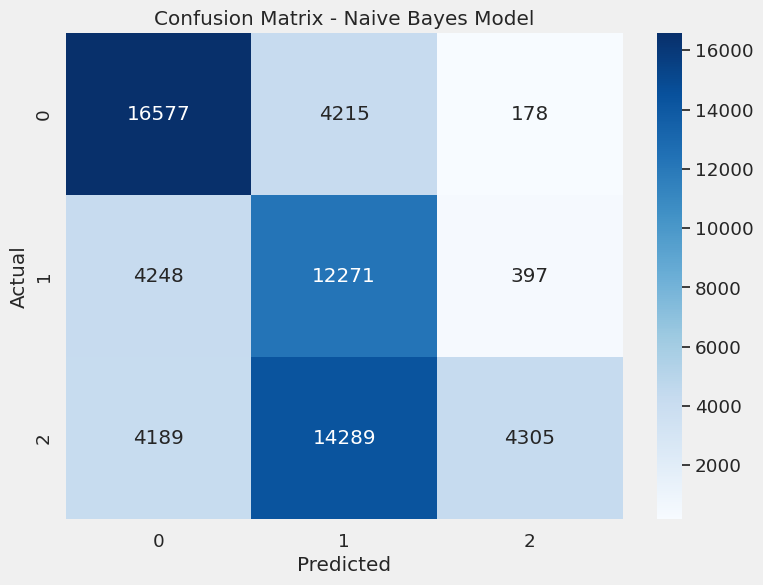

In [ ]:
# Create and fit the Naive Bayes model
m1 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train, y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)

# Print confusion matrix
print("Confusion matrix:")
print(nb_conf_matrix)
print("\n")

# Print accuracy score
print("Accuracy of Naive Bayes model:", nb_acc_score * 100, '%\n')

# Print classification report
print(classification_report(y_test, nbpred))

# Decorate confusion matrix plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {m1} Model")
plt.show()

Confusion matrix:
[[17664   535  2771]
 [ 4446  8002  4468]
 [ 1244  1560 19979]]


Accuracy of Random Forest Classifier: 75.23611729219206 %

              precision    recall  f1-score   support

           0       0.76      0.84      0.80     20970
           1       0.79      0.47      0.59     16916
           2       0.73      0.88      0.80     22783

    accuracy                           0.75     60669
   macro avg       0.76      0.73      0.73     60669
weighted avg       0.76      0.75      0.74     60669



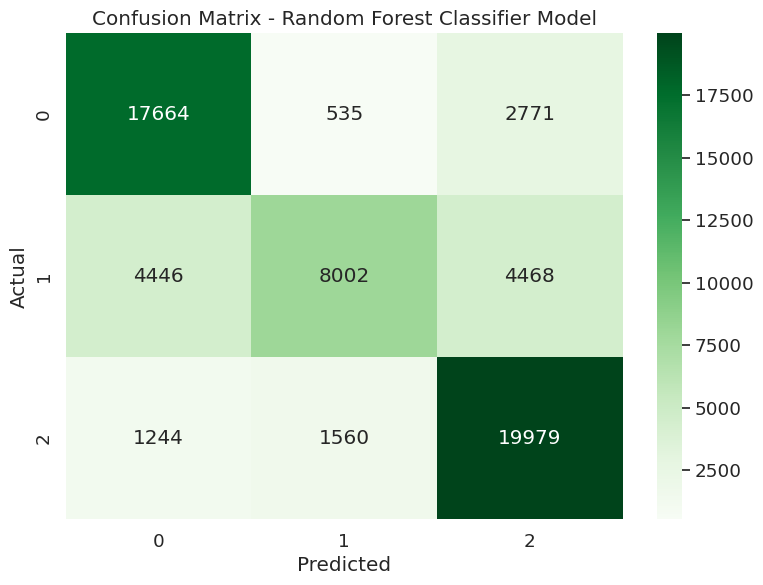

In [ ]:
# Create and fit the Random Forest Classifier model

m2 = 'Random Forest Classifier'
rf = RandomForestClassifier(n_estimators=20, random_state=2, max_depth=5)
model = rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

# Print confusion matrix
print("Confusion matrix:")
print(rf_conf_matrix)
print("\n")

# Print accuracy score
print("Accuracy of Random Forest Classifier:", rf_acc_score * 100, '%\n')

# Print classification report
print(classification_report(y_test, rf_predicted))

# Decorate confusion matrix plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap="Greens",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {m2} Model")
plt.show()

Confusion matrix:
[[18598   830  1542]
 [ 4044 10075  2797]
 [  487   951 21345]]


Accuracy of Extreme Gradient Boost: 82.44408182102886 %

              precision    recall  f1-score   support

           0       0.80      0.89      0.84     20970
           1       0.85      0.60      0.70     16916
           2       0.83      0.94      0.88     22783

    accuracy                           0.82     60669
   macro avg       0.83      0.81      0.81     60669
weighted avg       0.83      0.82      0.82     60669



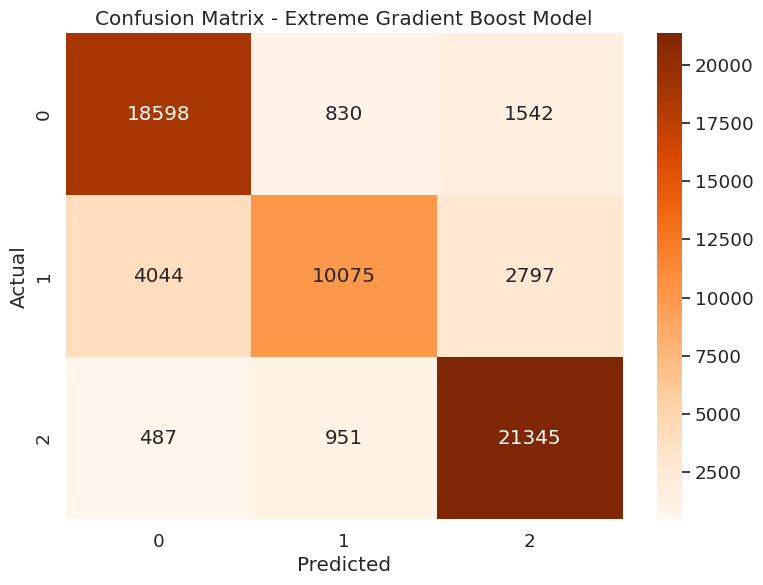

In [ ]:
# Create and fit the XGBoost Classifier model

m3 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15, gamma=0.6, subsample=0.52,
                    colsample_bytree=0.6, seed=27, reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)

# Print confusion matrix
print("Confusion matrix:")
print(xgb_conf_matrix)
print("\n")

# Print accuracy score
print("Accuracy of Extreme Gradient Boost:", xgb_acc_score * 100, '%\n')

# Print classification report
print(classification_report(y_test, xgb_predicted))

# Decorate confusion matrix plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap="Oranges",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {m3} Model")
plt.show()

Confusion matrix:
[[18208  1415  1347]
 [ 3828 10862  2226]
 [  623  1557 20603]]


Accuracy of K-Nearest Neighbors Classifier: 81.87542237386474 %

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     20970
           1       0.79      0.64      0.71     16916
           2       0.85      0.90      0.88     22783

    accuracy                           0.82     60669
   macro avg       0.81      0.80      0.81     60669
weighted avg       0.82      0.82      0.82     60669



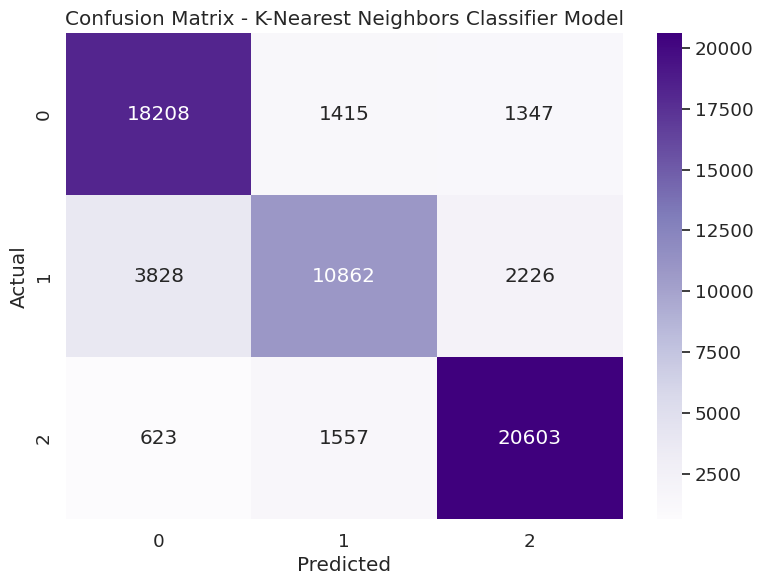

In [ ]:
# Create and fit the K-Nearest Neighbors Classifier model
m4 = 'K-Nearest Neighbors Classifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

# Print confusion matrix
print("Confusion matrix:")
print(knn_conf_matrix)
print("\n")

# Print accuracy score
print("Accuracy of K-Nearest Neighbors Classifier:", knn_acc_score * 100, '%\n')

# Print classification report
print(classification_report(y_test, knn_predicted))

# Decorate confusion matrix plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap="Purples",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {m4} Model")
plt.show()

Confusion matrix:
[[18906   282  1782]
 [ 5403  8291  3222]
 [ 2160  1269 19354]]


Accuracy of Decision Tree Classifier: 76.72946644909263 %

              precision    recall  f1-score   support

           0       0.71      0.90      0.80     20970
           1       0.84      0.49      0.62     16916
           2       0.79      0.85      0.82     22783

    accuracy                           0.77     60669
   macro avg       0.78      0.75      0.75     60669
weighted avg       0.78      0.77      0.76     60669



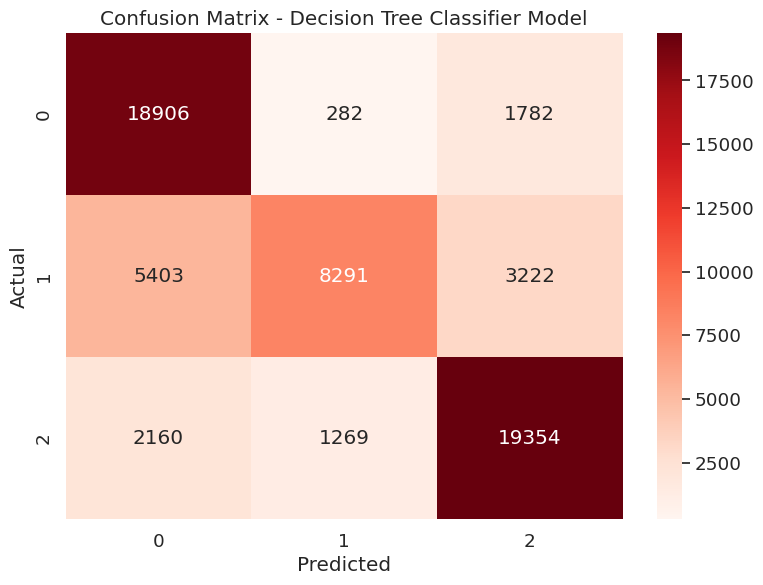

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# Assuming you have already defined X_train, X_test, y_train, y_test

# Create and fit the Decision Tree Classifier model
m5 = 'Decision Tree Classifier'
dt = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)

# Print confusion matrix
print("Confusion matrix:")
print(dt_conf_matrix)
print("\n")

# Print accuracy score
print("Accuracy of Decision Tree Classifier:", dt_acc_score * 100, '%\n')

# Print classification report
print(classification_report(y_test, dt_predicted))

# Decorate confusion matrix plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap="Reds",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {m5} Model")
plt.show()


In [ ]:
m6 = 'Support Vector Classifier'
svc = SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print ("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print (classification_report(y_test,svc_predicted))

confusion matrix
[[17844  1031  2095]
 [ 4313 10045  2558]
 [ 1202  1271 20310]]


Accuracy of Support Vector Classifier: 79.4458454894592 

              precision    recall  f1-score   support

           0       0.76      0.85      0.81     20970
           1       0.81      0.59      0.69     16916
           2       0.81      0.89      0.85     22783

    accuracy                           0.79     60669
   macro avg       0.80      0.78      0.78     60669
weighted avg       0.80      0.79      0.79     60669



In [ ]:
model_ev = pd.DataFrame({'Model': ['Naive Bayes',
'Random Forest Classifier',
'Extreme Gradient Boost',
'K-Nearest Neighbors Classifier',
'Decision Tree Classifier',
'Support Vector Classifier'], 'Accuracy': [
                            nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Naive Bayes,54.645700
1,Random Forest Classifier,75.236117
2,Extreme Gradient Boost,82.444082
3,K-Nearest Neighbors Classifier,81.875422
4,Decision Tree Classifier,76.729466
5,Support Vector Classifier,79.445845


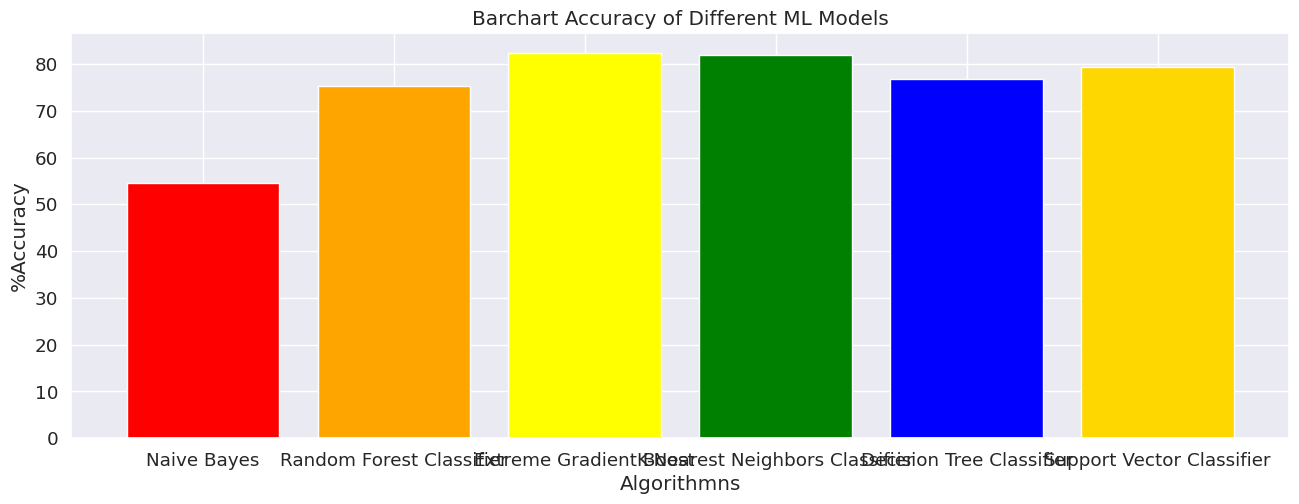

In [ ]:
colors = ['red','orange', 'yellow', 'green' , 'blue' , 'gold', 'orange']
plt.figure(figsize=(14,5))
plt.title("Barchart Accuracy of Different ML Models")
plt.xlabel("Algorithmns")
plt.ylabel("%Accuracy" )
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()